# DWS_RegEx_Naukri Website

In [2]:
import pandas as pd
import bs4
import selenium
import requests

from selenium import webdriver

In [4]:
naukri = pd.read_csv('naukri_jobs_datascience.csv')

In [5]:
naukri.head()

,id,title,location,experience,skills,company,salary,description,posted_date,type,url
0,280918001664,Data Science,Mumbai,2-4 yrs,"Algorithms, Machine Learning, Python, Java, Da...",Netcore Solutions Pvt Ltd,"2,00,000 - 7,00,000 P.A.",At least 2 year of experience in data engineer...,1 day ago,hotjob,https://www.naukri.com/job-listings-Data-Scien...
1,280818003404,Analyst / Sr. Analyst (data Science),Gurgaon,5-8 yrs,"predictive modeling, predictive analytics, mac...",Cvent India Pvt. Ltd.,"5,00,000 - 10,00,000 P.A.",Strong experience on providing predictive mode...,Today,hotjob,https://www.naukri.com/job-listings-Analyst-Sr...
2,280918008755,ETL Lead & Data Science,"Chennai, Bengaluru, Mumbai, Pune, Noida",7-10 yrs,"SQL, Data Analysis, Text Mining, SAS, R, Stati...",COMPUTER POWER GROUP PRIVATE LIMITED,"10,00,000 - 15,00,000 P.A.",Industry experience in building and operationa...,1 day ago,hotjob,https://www.naukri.com/job-listings-ETL-Lead-D...
3,270918901342,Specialist - Data Science,"Delhi NCR, Bengaluru, Gurgaon",7-12 yrs,"Specialist - Data Science, Data Science, data ...",Brainsearch Consulting Pvt Ltd.Â,Not disclosed,- Experience with one or more data science pro...,1 day ago,premium,https://www.naukri.com/job-listings-Specialist...
4,260918002450,Group Manager - Data Science - Python/nlp,Bengaluru,6-11 yrs,"machine learning, text mining, r, nlp, data sc...",Staffio HR,Not disclosed,- This is a Team management role - Skill set ...,1 day ago,premium,https://www.naukri.com/job-listings-Group-Mana...


In [6]:
naukri['salary'].head(10)

0          2,00,000 - 7,00,000 P.A.  
1         5,00,000 - 10,00,000 P.A.  
2        10,00,000 - 15,00,000 P.A.  
3                      Not disclosed 
4                      Not disclosed 
5          2,00,000 - 4,25,000 P.A.  
6          4,00,000 - 8,00,000 P.A.  
7                      Not disclosed 
8                      Not disclosed 
9                      Not disclosed 
Name: salary, dtype: object

## Regex to remove alphabets

In [8]:
naukri['salary'].str.replace('P.A.','-').head(5)

# if specify empty, it will remove those strings

0          2,00,000 - 7,00,000 -  
1         5,00,000 - 10,00,000 -  
2        10,00,000 - 15,00,000 -  
3                   Not disclosed 
4                   Not disclosed 
Name: salary, dtype: object

In [13]:
naukri['salary'].str.replace('[a-z]','').head(5)

0          2,00,000 - 7,00,000 P.A.  
1         5,00,000 - 10,00,000 P.A.  
2        10,00,000 - 15,00,000 P.A.  
3                                 N  
4                                 N  
Name: salary, dtype: object

In [15]:
naukri['salary'].str.replace('[a-zA-Z]','').head(5)

0          2,00,000 - 7,00,000 ..  
1         5,00,000 - 10,00,000 ..  
2        10,00,000 - 15,00,000 ..  
3                                  
4                                  
Name: salary, dtype: object

## Regex to remove numbers

In [16]:
naukri['salary'].str.replace('[0-9]','').head(5)

0        ,, - ,, P.A.  
1        ,, - ,, P.A.  
2        ,, - ,, P.A.  
3        Not disclosed 
4        Not disclosed 
Name: salary, dtype: object

## Regex to remove numbers and alphabets

In [17]:
naukri['salary'].str.replace('[a-zA-Z0-9]','').head(5)

0        ,, - ,, ..  
1        ,, - ,, ..  
2        ,, - ,, ..  
3                    
4                    
Name: salary, dtype: object

## Retain alphabets and remove everything else

In [18]:
naukri['salary'].str.replace('[^a-zA-Z]', '').head(5)

0              PA
1              PA
2              PA
3    Notdisclosed
4    Notdisclosed
Name: salary, dtype: object

In [21]:
naukri['salary'].str.replace('[^a-zA-Z ]', '').head(5)

0                PA  
1                PA  
2                PA  
3      Not disclosed 
4      Not disclosed 
Name: salary, dtype: object

In [22]:
naukri['salary'].str.replace('[^a-zA-Z .]', '').head(5)

0              P.A.  
1              P.A.  
2              P.A.  
3      Not disclosed 
4      Not disclosed 
Name: salary, dtype: object

## Retain numbers and remove everything else

In [25]:
naukri['salary'].str.replace('[^0-9]', '').head(5)

0      200000700000
1     5000001000000
2    10000001500000
3                  
4                  
Name: salary, dtype: object

In [26]:
naukri['salary'].str.replace('[^0-9-]', '').head(5)

0      200000-700000
1     500000-1000000
2    1000000-1500000
3                   
4                   
Name: salary, dtype: object

## RegEx Split function

In [27]:
x = '20000-70000'
x.split('-')[0]

'20000'

In [28]:
x = '20000-70000'
x.split('-')[1]

'70000'

## RegEx operations

In [29]:
naukri['salary_regex'] = naukri['salary'].str.replace('[^0-9-]', '')
naukri[['salary','salary_regex']].head()

,salary,salary_regex
0,"2,00,000 - 7,00,000 P.A.",200000-700000
1,"5,00,000 - 10,00,000 P.A.",500000-1000000
2,"10,00,000 - 15,00,000 P.A.",1000000-1500000
3,Not disclosed,
4,Not disclosed,


In [63]:
def get_salary(value,type_salary):
    if(type_salary == 'low'):
        try:
            return float(value.split('-')[0])
        except:
            return 0
    else:
        try:
            return float(value.split('-')[1])
        except:
            return 0

In [64]:
print(get_salary(x,'low'))
print(get_salary(x,'high'))
print(get_salary('50000','low'))
#print(get_salary('','low'))
print(get_salary('50000','high'))

20000.0
70000.0
50000.0
0


In [65]:
naukri['sal_low'] = naukri['salary_regex'].apply(lambda v: get_salary(v,'low'))

naukri['sal_high'] = naukri['salary_regex'].apply(lambda v: get_salary(v,'high'))

In [44]:
naukri[['salary','sal_low','sal_high']].head()

,salary,sal_low,sal_high
0,"2,00,000 - 7,00,000 P.A.",200000,700000
1,"5,00,000 - 10,00,000 P.A.",500000,1000000
2,"10,00,000 - 15,00,000 P.A.",1000000,1500000
3,Not disclosed,,0
4,Not disclosed,,0


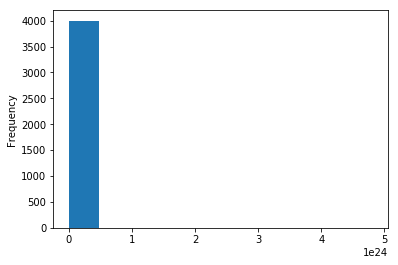

In [66]:
%matplotlib inline
naukri['sal_low'].plot.hist()

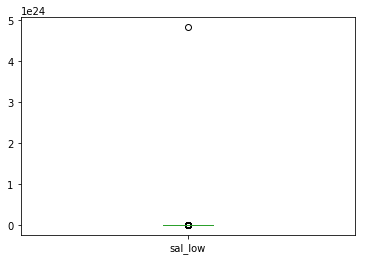

In [67]:
naukri['sal_low'].plot.box()

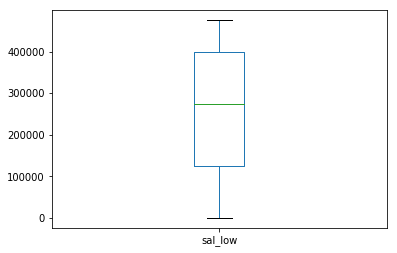

In [74]:
subset = naukri[(naukri['sal_low'] != 0) & (naukri['sal_low'] < 500000)]
subset['sal_low'].plot.box(showfliers = False)

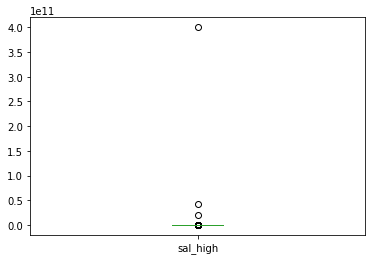

In [69]:
naukri['sal_high'].plot.box()

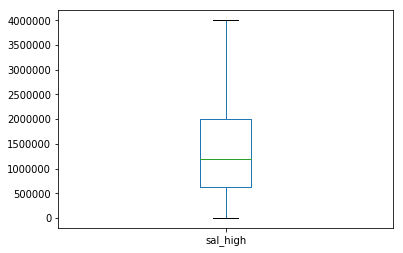

In [79]:
subset = naukri[(naukri['sal_high'] != 0) & (naukri['sal_high'] < 5000000)]
subset['sal_high'].plot.box(showfliers = False)

## APPLY Functions

In [52]:
df = pd.DataFrame([1,2,4,5],columns = ['A'])
df

,A
0,1
1,2
2,4
3,5


In [53]:
df['A'].apply(lambda v: v*v)

0     1
1     4
2    16
3    25
Name: A, dtype: int64

In [54]:
df['A'].apply(lambda v: True if v>2 else False)

0    False
1    False
2     True
3     True
Name: A, dtype: bool

In [81]:
def square_num(value,operation):
    if operation =='add':
        return value+value
    if operation == 'square':
        return value*value
df['B'] = df['A'].apply(lambda v:square_num(v,'square'))    
df

,A,B
0,1,1
1,2,4
2,4,16
3,5,25


In [83]:
df = pd.DataFrame(['this is sentence with 123 and ^&#',
                  'my email id is abc@gmail.com',
                  'my phone number is 8971856021',
                  'my pincode is 123456'],
                 columns = ['text'])
df

,text
0,this is sentence with 123 and ^&#
1,my email id is abc@gmail.com
2,my phone number is 8971856021
3,my pincode is 123456


In [87]:
import re
df['text'].str.replace('[^0-9]','')

0           123
1              
2    8971856021
3        123456
Name: text, dtype: object

In [88]:
import re
pattern = re.compile('[0-9]{10}')
sentence = ' '.join(df['text'].values)
sentence

'this is sentence with 123 and ^&# my email id is abc@gmail.com my phone number is 8971856021 my pincode is 123456'

In [89]:
re.findall(pattern = pattern,string = sentence)

['8971856021']

In [108]:
re.findall(pattern = '.*@.*.edu',string = 'abc@gmail.com 12344@abc.edu')

['abc@gmail.com 12344@abc.edu']

## Click button through selenium

In [109]:
from selenium import webdriver

In [112]:
browser = webdriver.Chrome('chromedriver.exe')
browser.get('https://www.naukri.com/data-science-jobs')


In [113]:
browser.find_element_by_css_selector('button.grayBtn').click()

## Insert text in a serach bar

In [114]:
browser.get('https://www.google.com')

In [115]:
browser.find_element_by_css_selector('input#lst-ib')

<selenium.webdriver.remote.webelement.WebElement (session="c07a3fc1d0301c1542bc52022633ec90", element="0.8402139711338261-1")>

In [116]:
search_box = browser.find_element_by_css_selector('input#lst-ib')
search_box.send_keys('datascience')

In [119]:
browser.find_element_by_css_selector('input[value="Google Search"]')

<selenium.webdriver.remote.webelement.WebElement (session="c07a3fc1d0301c1542bc52022633ec90", element="0.8402139711338261-2")>

In [121]:
q = 'input[value="Google Search"][type="submit"]'
browser.find_element_by_css_selector(q).click()